# **Generating equation from trained model having non-linear activation functions**

Iris Dataset

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets




In [ ]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
x = np.array(X)
y = np.array(y)

In [ ]:
# code the label: 0, 1, 2, 3
# do one hot encoding

y = np.where(y == 'Iris-setosa', [1, 0, 0], y)
y = np.where(y == 'Iris-versicolor', [0, 1, 0], y)
y = np.where(y == 'Iris-virginica', [0, 0, 1], y)


In [ ]:
input_shape = x.shape[1]
output_shape = y.shape[1]

In [ ]:
input_shape

4

In [ ]:
output_shape

3

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, input_shape=[input_shape]),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(256),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(output_shape, activation=tf.keras.activations.sigmoid)
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0005), loss= tf.keras.losses.categorical_crossentropy, metrics = ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Print the model summary
model_summary = model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,559 (146.71 KB)

 Trainable params: 37,559 (146.71 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
x = x.astype(np.float32)  # Assuming 'x' is your input data
y = y.astype(np.float32)  # Assuming 'y' is your target data


In [ ]:
history = model.fit(x, y, epochs=100, verbose=1)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9710 - loss: 0.0986 
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9776 - loss: 0.0652 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9798 - loss: 0.0766
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9593 - loss: 0.0845  
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9558 - loss: 0.1092 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9698 - loss: 0.0782 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9802 - loss: 0.0518 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9619 - loss: 0.0783 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9493 - loss: 0.0973 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9632 - loss: 0.0900 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9746 - loss: 0.0607 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9676 - lo

In [ ]:
# save model

model.save('trained_Iris_model.keras')

# **Prediction from trained AI Model**

In [ ]:
x_test = [3.1, 1.5, 1.4, 1.2]
x_test = np.array(x_test)
x_test = x_test.astype(np.float64)
x_test = np.expand_dims(x_test, axis=0)
model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


array([[0.00465603, 0.8872167 , 0.35579088]], dtype=float32)

# **Prediction from equivalent equation**

In [ ]:
from math import exp
def predict(x0, x1, x2, x3):

  Z = [1/(0.336927059796006*exp(-1.01923058650053*x0 - 5.45795516051808*x1 + 4.22798520265338*x2 + 5.80350937212139*x3) + 1),
  1/(0.630246674468187*exp(-0.980475678995354*x0 - 1.89214686096236*x1 + 1.22616608676277*x2 + 2.13838621395742*x3) + 1),
  1/(3.09121873386778*exp(1.69858695969237*x0 + 5.02900156143935*x1 - 3.83821223342246*x2 - 5.61570876917348*x3) + 1)]

  return Z

predict(3.1, 1.5, 1.4, 1.2)

[0.38960945275318776, 0.886617128605157, 0.13879438491236845]

___________________________________

# **Comperative Analysis of performance**

*prompt: load .keras file and compress using qunatization, pruning, knowledge distillation*

**Quantization**

In [ ]:

# --- Quantization ---
# Convert the model to TFLite with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
quantized_tflite_model = converter.convert()

# Save the quantized model
with open('quantized_model.tflite', 'wb') as f:
    f.write(quantized_tflite_model)


Saved artifact at '/tmp/tmp7kwrnnk8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 4), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  134764759486480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134764759489360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134764759489552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134764759485712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134764759489168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134764759491088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134764759489936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134764759490128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134764759488592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134764759492816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134764759492624: TensorS

**Pruning**

In [ ]:
# --- Pruning ---
# Install the tensorflow_model_optimization library
!pip install -q tensorflow_model_optimization
import tensorflow_model_optimization as tfmot


In [ ]:
import tensorflow as tf
import tensorflow_model_optimization as tfmot

# Define input and output shapes
input_shape = 10  # Update this based on your actual input shape
output_shape = 5  # Update this based on your actual output shape

# Define a pruning schedule (prunes 20% → 50% gradually)
pruning_schedule = tfmot.sparsity.keras.PolynomialDecay(
    initial_sparsity=0.2, final_sparsity=0.5, begin_step=0, end_step=1000
)

# Create a pruned version of your Sequential model
pruned_model = tf.keras.Sequential([
    tfmot.sparsity.keras.prune_low_magnitude(
        tf.keras.layers.Dense(4, input_shape=[input_shape]), pruning_schedule),
    tfmot.sparsity.keras.prune_low_magnitude(
        tf.keras.layers.Dense(32), pruning_schedule),
    tfmot.sparsity.keras.prune_low_magnitude(
        tf.keras.layers.Dense(64), pruning_schedule),
    tfmot.sparsity.keras.prune_low_magnitude(
        tf.keras.layers.Dense(256), pruning_schedule),
    tfmot.sparsity.keras.prune_low_magnitude(
        tf.keras.layers.Dense(64), pruning_schedule),
    tfmot.sparsity.keras.prune_low_magnitude(
        tf.keras.layers.Dense(32), pruning_schedule),
    tfmot.sparsity.keras.prune_low_magnitude(
        tf.keras.layers.Dense(output_shape, activation=tf.keras.activations.sigmoid), pruning_schedule)
])

# Compile the pruned model
pruned_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Print model summary to confirm pruning
pruned_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: `prune_low_magnitude` can only prune an object of the following types: keras.models.Sequential, keras functional model, keras.layers.Layer, list of keras.layers.Layer. You passed an object of type: Dense.

In [ ]:


# Define a pruning schedule (prunes 20% to 50% gradually)
pruning_schedule = tfmot.sparsity.keras.PolynomialDecay(
    initial_sparsity=0.2, final_sparsity=0.5, begin_step=0, end_step=1000
)

# Apply pruning wrapper to each layer
def apply_pruning_to_layers(layer):
    if isinstance(layer, tf.keras.layers.Dense) or isinstance(layer, tf.keras.layers.Conv2D):
        return tfmot.sparsity.keras.prune_low_magnitude(layer, pruning_schedule)
    return layer

# Create a new pruned model
pruned_model = tf.keras.models.clone_model(
    model,
    clone_function=apply_pruning_to_layers
)

# Compile the pruned model
pruned_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Print model summary to confirm pruning
pruned_model.summary()


ValueError: `prune_low_magnitude` can only prune an object of the following types: keras.models.Sequential, keras functional model, keras.layers.Layer, list of keras.layers.Layer. You passed an object of type: Dense.

In [ ]:


# --- Knowledge Distillation ---
# Create a student model (smaller than the teacher model)
student_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, input_shape=[x.shape[1]], activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(y.shape[1], activation='sigmoid')
])

# Compile the student model
student_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                      loss=tf.keras.losses.categorical_crossentropy,
                      metrics=['accuracy'])

# Train the student model using the teacher model's predictions as soft targets
temperature = 2.0  # Temperature parameter for softening probabilities

# Create a soft target generator
def soft_targets(teacher_model, x, temperature):
    soft_logits = teacher_model(x) / temperature
    return tf.nn.softmax(soft_logits, axis=-1)

# Generate soft targets from the teacher model
soft_y = soft_targets(model, x, temperature)

# Train the student model on the soft targets
student_model.fit(x, soft_y, epochs=100, verbose=1, batch_size=20)

#save student model
student_model.save('distilled_model.keras')

print("Quantization, Pruning, and Knowledge Distillation completed.")


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.3386 - loss: 2.0000
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3230 - loss: 1.6692 
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3197 - loss: 1.4331 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0023 - loss: 1.2786     
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0805 - loss: 1.1600 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3258 - loss: 1.1067 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4403 - loss: 1.0929 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4840 - loss: 1.0914 
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3837 - loss: 1.0902 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3555 - loss: 1.0905 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3178 - loss: 1.0912  
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2679 

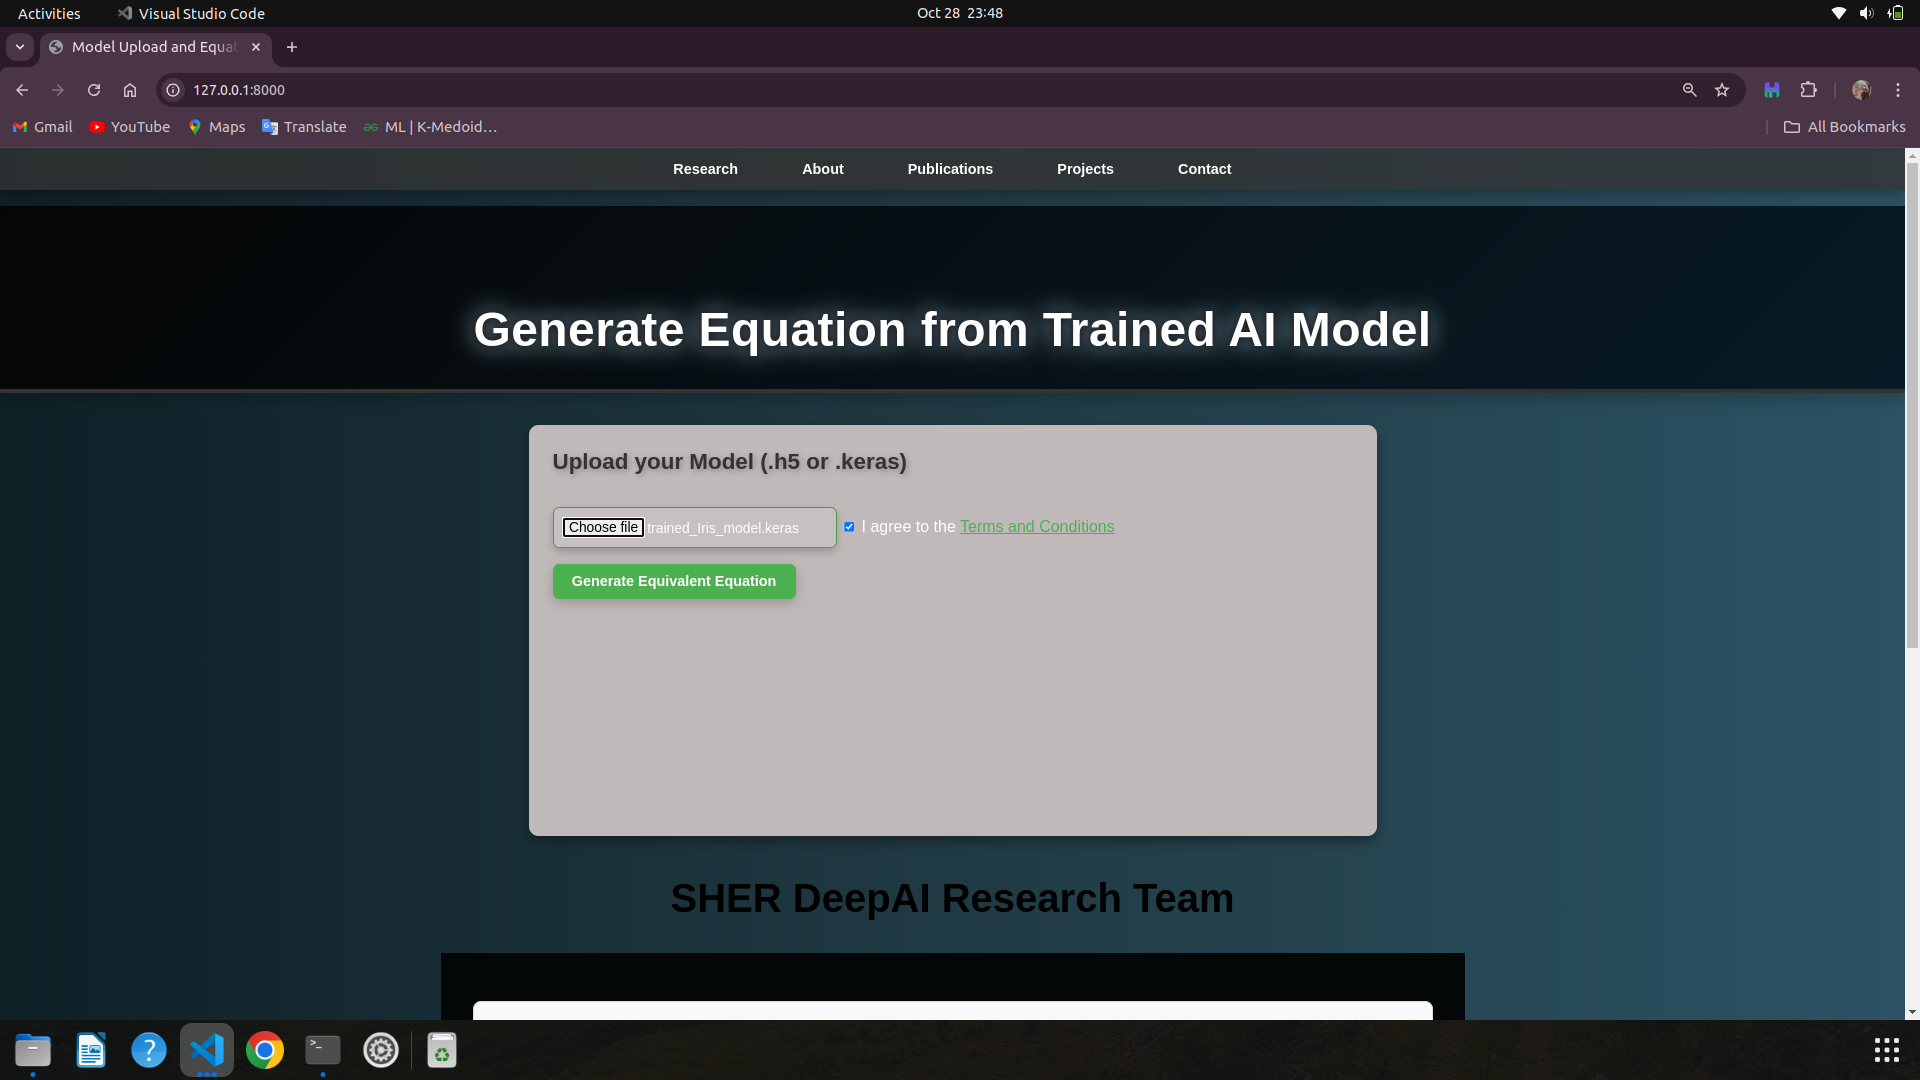

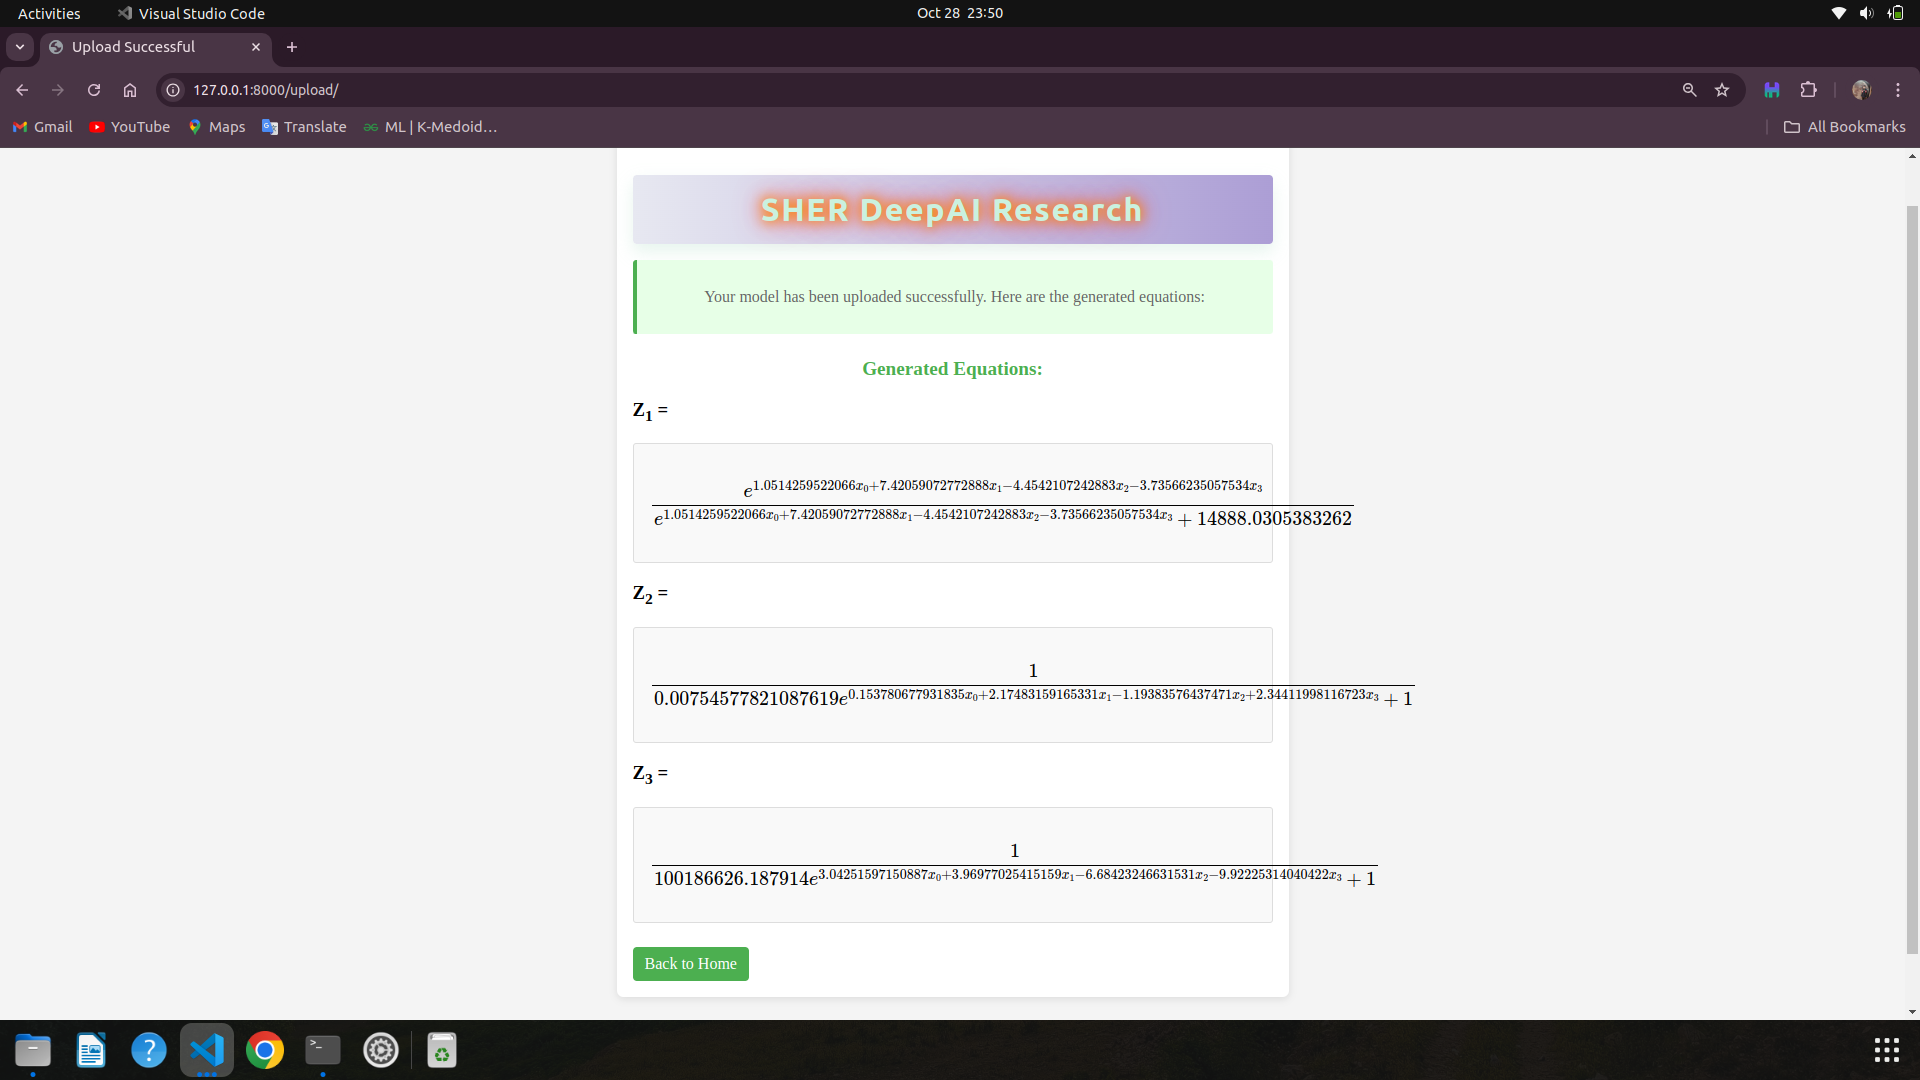